In [1]:
import geopandas as gpd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import sklearn.ensemble
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import pickle
import shap

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path_3 = '/home/jovyan/private/Thesis/Accra/Acc_train_data/'

In [3]:
test_data = gpd.read_file(path_3 + 'acc_train_data2.shp')

In [4]:
test_data.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,geometry
0,86567,2.50698,0.186113,360.555,640.312,1204.160,632.456,1843.91,2302.17,1565.250,...,0.155306,0.930247,2.597099,0.031353,0.696384,0.553753,0.003107,0.0002,0,"POLYGON ((812966.663 626608.135, 812866.663 62..."
1,83558,3.82335,0.206773,300.000,400.000,948.683,223.607,2202.27,2561.25,1140.180,...,0.132862,0.942802,3.236379,0.023122,0.654051,0.648812,0.002170,0.0002,0,"POLYGON ((812966.663 627108.135, 812866.663 62..."
2,81118,2.11887,0.120556,447.214,640.312,894.427,1200.000,2158.70,1204.16,1300.000,...,0.000000,1.000000,2.874905,0.023824,0.608380,0.582100,0.002222,0.0011,0,"POLYGON ((811066.663 627508.135, 810966.663 62..."
3,81125,1.82407,0.133298,360.555,854.400,316.228,1044.030,2109.50,1442.22,707.107,...,0.041834,0.983337,1.971021,0.029323,0.686258,0.546040,0.002230,0.0016,0,"POLYGON ((811766.663 627508.135, 811666.663 62..."
4,84763,3.23535,0.239422,360.555,447.214,1029.560,360.555,2051.83,2601.92,1303.840,...,0.203561,0.901902,2.674418,0.027024,0.697065,0.600476,0.002463,0.0001,0,"POLYGON ((812966.663 626908.135, 812866.663 62..."


<AxesSubplot: >

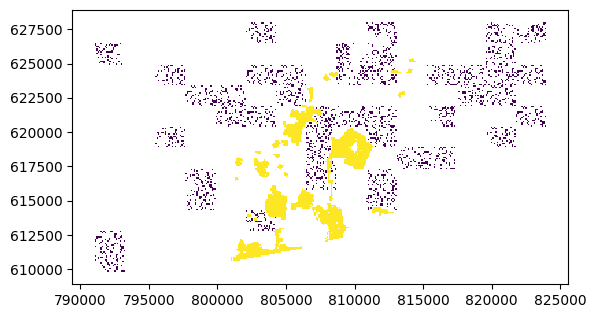

In [5]:
test_data.plot('class')

In [6]:
test_data = test_data.drop(columns=['ORIG_FID','geometry'])

In [7]:
test_data.shape

(5048, 114)

In [8]:
# test_data.plot()

In [9]:
# define target and predictors
X = test_data.drop('class', axis=1)
y = test_data['class']

In [10]:
# Split the data into training and test sets
X_test, y_test = (X, y)

In [11]:
X_test.head()

,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,Dist_Kind,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,2.50698,0.186113,360.555,640.312,1204.160,632.456,1843.91,2302.17,1565.250,1421.270,...,0.221270,0.940295,0.155306,0.930247,2.597099,0.031353,0.696384,0.553753,0.003107,0.0002
1,3.82335,0.206773,300.000,400.000,948.683,223.607,2202.27,2561.25,1140.180,1081.670,...,0.230829,0.969324,0.132862,0.942802,3.236379,0.023122,0.654051,0.648812,0.002170,0.0002
2,2.11887,0.120556,447.214,640.312,894.427,1200.000,2158.70,1204.16,1300.000,1019.800,...,0.135201,0.946983,0.000000,1.000000,2.874905,0.023824,0.608380,0.582100,0.002222,0.0011
3,1.82407,0.133298,360.555,854.400,316.228,1044.030,2109.50,1442.22,707.107,360.555,...,0.226929,0.886794,0.041834,0.983337,1.971021,0.029323,0.686258,0.546040,0.002230,0.0016
4,3.23535,0.239422,360.555,447.214,1029.560,360.555,2051.83,2601.92,1303.840,1204.160,...,0.344158,0.943947,0.203561,0.901902,2.674418,0.027024,0.697065,0.600476,0.002463,0.0001


In [12]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [13]:
X_test.shape, y_test.shape

((5048, 113), (5048,))

In [14]:
# Assuming X_train and y_train are already defined
print("NaN values in X_test:", np.isnan(X_test).any())
print("NaN values in y_test:", np.isnan(y_test).any())

NaN values in X_test: ZonalSt_Sl    False
NDVI          False
Dist_ATM      False
Dist_Banks    False
Dist_Clin     False
              ...  
bERI_Gini_    False
bERI_Shann    False
bERI_Simps    False
bERI_Theil    False
blg_densit    False
Length: 113, dtype: bool
NaN values in y_test: False


In [15]:

#load pretrained model
# Path to the saved model file
model_path = '/home/jovyan/private/Thesis/RF_model/nai_spatial_block_rf_m3.pkl'

# Load the trained model from the file
with open(model_path, 'rb') as file:
    best_rf_model_3 = pickle.load(file)

# Assuming 'new_data' is your new dataset for prediction
# Make sure 'new_data' is preprocessed in the same way as the training data was

# Use the loaded model to make predictions
y_pred = best_rf_model_3.predict(X_test)
y_pred
# 'predictions' now contains the predicted values for the new data


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



array([0, 0, 0, ..., 1, 1, 1])

In [16]:
 # Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

    


print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)


Accuracy: 0.87
Confusion Matrix:
 [[2115  409]
 [ 243 2281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      2524
           1       0.85      0.90      0.87      2524

    accuracy                           0.87      5048
   macro avg       0.87      0.87      0.87      5048
weighted avg       0.87      0.87      0.87      5048



In [23]:
#also experiment by getting top 20 from the model 3 itself

In [24]:
feature_importance_m3_df = pd.read_csv('/home/jovyan/private/Thesis/RF_model_results/feature_importances_model3.csv')
feature_importance_m3_df

,Unnamed: 0,Feature,Importance
0,44,sdcArea_m,0.049441
1,39,ltbIBD_m,0.046703
2,18,building_c,0.043458
3,48,mdcAre_m,0.042382
4,98,sdcArea_Si,0.038208
...,...,...,...
108,41,stbSAl_m,0.000761
109,72,misRea_m,0.000665
110,76,mtdDeg_m,0.000586
111,83,xcnSCl_m,0.000563


In [25]:
top_20_data_df= feature_importance_m3_df.head(20)
top_20_data_df

,Unnamed: 0,Feature,Importance
0,44,sdcArea_m,0.049441
1,39,ltbIBD_m,0.046703
2,18,building_c,0.043458
3,48,mdcAre_m,0.042382
4,98,sdcArea_Si,0.038208
5,112,blg_densit,0.034755
6,51,sicCAR_m,0.034278
7,47,mtcWNe_m,0.033375
8,14,Dist_Sch,0.032906
9,36,mtbNDi_m,0.031600


In [26]:
# prepare data for top 20 features 
# Now you can use the top 20 features to train a second model
top_20_features_m3 = top_20_data_df['Feature'].tolist()
top_20_features_m3

['sdcArea_m',
 'ltbIBD_m',
 'building_c',
 'mdcAre_m',
 'sdcArea_Si',
 'blg_densit',
 'sicCAR_m',
 'mtcWNe_m',
 'Dist_Sch',
 'mtbNDi_m',
 'sdcLAL_m',
 'sicFAR_m',
 'licGDe_m',
 'Dist_Dump',
 'midRea_m',
 'sdcArea_Sh',
 'bArea_Gini',
 'ltcWRB_m',
 'sdsSPO_m',
 'sdsSPW_m']

In [27]:
X_test_t20 = X_test[top_20_features_m3]
X_test_t20

,sdcArea_m,ltbIBD_m,building_c,mdcAre_m,sdcArea_Si,blg_densit,sicCAR_m,mtcWNe_m,Dist_Sch,mtbNDi_m,sdcLAL_m,sicFAR_m,licGDe_m,Dist_Dump,midRea_m,sdcArea_Sh,bArea_Gini,ltcWRB_m,sdsSPO_m,sdsSPW_m
0,2225.836751,28.877522,2,19667.796252,0.256993,0.0002,0.137403,0.044270,707.107,28.145024,60.211629,0.142049,0.167522,7716.22,115.000000,1.391806,0.566715,0.000025,0.746032,36.806051
1,4288.392226,29.241081,2,26443.404597,0.327517,0.0002,0.008840,0.028534,500.000,63.362065,94.688535,0.009785,0.087047,8190.85,210.000000,1.329628,0.589468,0.000047,0.642336,23.496138
2,537.395089,12.115838,11,4241.360138,0.478235,0.0011,0.231223,0.062240,282.843,12.277492,33.965129,0.331893,0.423314,8221.92,120.090909,0.834105,0.421703,0.000175,0.414690,24.354821
3,470.998932,15.818982,16,4782.068276,0.419294,0.0016,0.226937,0.073164,141.421,12.160275,30.817874,0.338984,0.323021,8302.41,219.187500,0.949054,0.574467,0.000110,0.617709,26.749191
4,9111.832044,50.832797,1,44378.282501,0.233056,0.0001,0.042413,0.016518,640.312,73.199074,133.274855,0.054289,0.075084,8000.62,82.000000,1.522903,0.643686,0.000019,0.777778,31.593954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,276.692927,7.602726,42,2600.100147,0.727380,0.0042,0.629500,0.120530,2147.090,3.318662,23.807709,0.957088,0.331800,10781.50,379.000000,0.552252,0.338792,0.000079,0.400000,11.237520
5044,192.584493,3.042954,48,1724.566753,0.879967,0.0048,0.604843,0.121427,2059.130,2.547993,22.441780,0.956727,0.611873,10705.60,379.000000,0.246679,0.439980,0.000095,0.400000,11.237520
5045,275.217783,4.877522,46,2324.691259,0.909699,0.0046,0.401104,0.115937,1972.310,4.666743,24.200691,0.561550,0.398071,10630.10,871.630435,0.201014,0.437209,0.000080,0.400000,11.237520
5046,316.063122,4.386711,55,2550.659962,0.857638,0.0055,0.482399,0.120762,1886.800,3.458585,23.506436,0.667195,0.341991,10555.10,906.000000,0.297277,0.370778,0.000078,0.320376,11.590158


In [28]:
#load model 4
model_path = '/home/jovyan/private/Thesis/RF_model/nai_spatial_block_rf_m4_top20.pkl'

# Load the trained model from the file
with open(model_path, 'rb') as file:
    best_rf_model_4 = pickle.load(file)


# Use the loaded model to make predictions
y_pred_4 = best_rf_model_4.predict(X_test_t20)
y_pred_4
# 'predictions' now contains the predicted values for the new data

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
from collections import Counter

# Assuming 'array' is your list
# array = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

# Count the unique values and the number of times each appears
unique_counts = Counter(y_pred_4)

# Print the count of each unique value
for value, count in unique_counts.items():
    print(f"Value {value} appears {count} times in the array.")


Value 0 appears 3131 times in the array.
Value 1 appears 1917 times in the array.


In [30]:
 # Compute metrics
accuracy = accuracy_score(y_test, y_pred_4)
conf_matrix = confusion_matrix(y_test, y_pred_4)
report = classification_report(y_test, y_pred_4)

    


print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)


Accuracy: 0.83
Confusion Matrix:
 [[2390  134]
 [ 741 1783]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85      2524
           1       0.93      0.71      0.80      2524

    accuracy                           0.83      5048
   macro avg       0.85      0.83      0.82      5048
weighted avg       0.85      0.83      0.82      5048

